# Word2Vec: Explorando o universo Harry Potter

Neste notebook, vamos usar Word2Vec para explorar os livros Harry Potter.

In [40]:
from gensim.models import Word2Vec
from gensim.utils import tokenize

In [41]:
PATH = 'Harry_Potter_e_A_Pedra_Filosofal.txt'
PATH2 = 'Harry_Potter_Camara_Secreta-br.txt'

## Processamento do texto
Leitura e tokenização dos livros Harry Potter.

In [42]:
f1 = open(PATH, 'r', encoding='utf-8')
f2 = open(PATH2, 'r', encoding='utf-8')

tokenized_text = []

for line in f1:
    tokens = list(tokenize(line, lower=True))
    tokenized_text.append(tokens)

for line in f2:
    tokens = list(tokenize(line, lower=True))
    tokenized_text.append(tokens)

f2.close()
f1.close()

## Treino do modelo Word2Vec

In [43]:
model = Word2Vec(tokenized_text, vector_size=300, window=5, min_count=1, sg=1, epochs=20, workers=3)

## Vetores de palavras

In [44]:
# Vetor para 'harry'
model.wv['harry']

array([ 0.00307501,  0.30436793, -0.01386526, -0.10425509, -0.2087651 ,
       -0.25901106,  0.19745913,  0.5094906 , -0.13074264, -0.13163236,
        0.01823612, -0.29337922, -0.29382738,  0.19490425, -0.31261143,
       -0.09112414,  0.22635499,  0.01412753, -0.17560007, -0.10834983,
       -0.05465079, -0.07099788, -0.23787075,  0.03494502, -0.26964423,
        0.00691087, -0.3887622 ,  0.38763085, -0.08366293, -0.32616377,
        0.13235591,  0.00610185,  0.15856968,  0.28231752, -0.08956715,
        0.10249165,  0.03545389, -0.46590775, -0.10202366,  0.30706173,
        0.03592927,  0.02238671, -0.22772786, -0.00161935, -0.02676301,
        0.4008969 , -0.20288508, -0.00813795,  0.02863867, -0.2510693 ,
       -0.11478218, -0.06377679, -0.21461287,  0.41339636, -0.29863226,
        0.08162041, -0.0598517 ,  0.04778294,  0.3685446 , -0.08240468,
        0.13837905,  0.129249  , -0.09596798,  0.05693488,  0.04699777,
       -0.25234216,  0.08970231,  0.12773506, -0.23675217,  0.07

## Palavras mais frequentes

In [45]:
# 20 palavras mais frequentes
print(model.wv.index_to_key[:20])

['de', 'que', 'a', 'o', 'e', 'harry', 'se', 'não', 'para', 'um', 'uma', 'os', 'com', 'do', 'em', 'ele', 'da', 'disse', 'é', 'no']


In [46]:
# Palavras mais frequentes sem stopwords
import nltk
from nltk.corpus import stopwords

try:
    stopwords_pt = set(stopwords.words('portuguese'))
except:
    nltk.download('stopwords')
    stopwords_pt = set(stopwords.words('portuguese'))

top_words = model.wv.index_to_key[:100]
top_words_no_stopwords = [w for w in top_words if w not in stopwords_pt]
print(top_words_no_stopwords[:20])

['harry', 'disse', 'rony', 'hagrid', 'coisa', 'hermione', 'bem', 'cabeça', 'olhos', 'ter', 'dumbledore', 'vez', 'perguntou', 'então', 'vai', 'porta', 'agora', 'lo', 'snape', 'parecia']


## Semelhanças entre palavras

In [47]:
# Palavras mais semelhantes a 'harry'
model.wv.most_similar('harry', topn=30)

[('firenze', 0.5700486898422241),
 ('alegria', 0.564174234867096),
 ('inveja', 0.5535821914672852),
 ('anão', 0.5535679459571838),
 ('desesperado', 0.5526531338691711),
 ('tremia', 0.552201509475708),
 ('autorização', 0.5507384538650513),
 ('escarlate', 0.5489989519119263),
 ('esgotaria', 0.5483719110488892),
 ('nervoso', 0.5476226210594177),
 ('portão', 0.547103226184845),
 ('usou', 0.5470502376556396),
 ('esguelha', 0.5463324189186096),
 ('hesitante', 0.5434917211532593),
 ('corando', 0.5425316095352173),
 ('latejar', 0.5418847799301147),
 ('selou', 0.5418650507926941),
 ('intrigado', 0.5401468873023987),
 ('esconder', 0.537521481513977),
 ('automaticamente', 0.5373116731643677),
 ('inclinando', 0.5371700525283813),
 ('deitou', 0.536834180355072),
 ('cantou', 0.5364722013473511),
 ('mudando', 0.5350648760795593),
 ('abruptamente', 0.5350630879402161),
 ('berrador', 0.5349411368370056),
 ('desvencilhar', 0.5344563722610474),
 ('contava', 0.5340095162391663),
 ('alarmada', 0.5338943600

In [48]:
# Palavras semelhantes a vários personagens
personagens = ['hermione', 'rony', 'dumbledore', 'snape', 'draco']

for personagem in personagens:
    print(f"Mais semelhantes a '{personagem}':")
    similares = model.wv.most_similar(personagem, topn=5)
    for palavra, similaridade in similares:
        print(f"  {palavra}: {similaridade:.4f}")
    print()

Mais similares a 'hermione':
  mione: 0.4838
  irritado: 0.4281
  berrador: 0.4213
  abaixando: 0.4203
  dino: 0.4174

Mais similares a 'rony':
  agarrando: 0.5363
  mione: 0.5309
  hesitante: 0.5236
  urgência: 0.5193
  intrigado: 0.5177

Mais similares a 'dumbledore':
  binns: 0.5613
  quirrell: 0.5244
  fudge: 0.5243
  flitwick: 0.5241
  pensativo: 0.4992

Mais similares a 'snape':
  flitwick: 0.5686
  quirrell: 0.5567
  professor: 0.5350
  demonstração: 0.5087
  dividiu: 0.4827

Mais similares a 'draco':
  goyle: 0.6078
  crabbe: 0.6001
  risadinhas: 0.5597
  rir: 0.5385
  doer: 0.5283



In [49]:
# Semelhança entre pares
pares = [('harry', 'rony'), ('harry', 'hermione'), ('harry', 'dumbledore'), 
         ('harry', 'snape'), ('harry', 'draco'), ('grifinória', 'sonserina')]

for w1, w2 in pares:
    sim = model.wv.similarity(w1, w2)
    print(f"Semelhança entre '{w1}' e '{w2}': {sim:.4f}")

Similaridade entre 'harry' e 'rony': 0.3906
Similaridade entre 'harry' e 'hermione': 0.2046
Similaridade entre 'harry' e 'dumbledore': 0.2320
Similaridade entre 'harry' e 'snape': 0.2692
Similaridade entre 'harry' e 'draco': 0.3147
Similaridade entre 'grifinória' e 'sonserina': 0.6425


## Analogias

In [50]:
print("Analogia: 'snape' + 'grifinória' - 'harry' = ?")
model.wv.most_similar(positive=['snape', 'grifinória'], negative=['harry'], topn=10)

Analogia: 'snape' + 'grifinória' - 'harry' = ?


[('comunal', 0.4862547814846039),
 ('poções', 0.4565465748310089),
 ('descontar', 0.4521031975746155),
 ('pontos', 0.4485532343387604),
 ('sonserina', 0.4452657997608185),
 ('corvinal', 0.44369056820869446),
 ('aula', 0.44034290313720703),
 ('lufa', 0.4272720515727997),
 ('herbologia', 0.403815358877182),
 ('sala', 0.3994176983833313)]

In [51]:
print("Analogia: 'draco' + 'grifinória' - 'harry' = ?")
model.wv.most_similar(positive=['draco', 'grifinória'], negative=['harry'], topn=10)

Analogia: 'draco' + 'grifinória' - 'harry' = ?


[('pontos', 0.512286365032196),
 ('sonserina', 0.5067096948623657),
 ('lufa', 0.4925328195095062),
 ('corvinal', 0.45659443736076355),
 ('membro', 0.44987761974334717),
 ('johnson', 0.44013047218322754),
 ('ganhado', 0.44010356068611145),
 ('time', 0.4392642080783844),
 ('jogadores', 0.4309753477573395),
 ('concedo', 0.4275418519973755)]

In [52]:
print("Analogia: 'sonserina' + 'harry' - 'draco' = ?")
model.wv.most_similar(positive=['sonserina', 'harry'], negative=['draco'], topn=5)

Analogia: 'sonserina' + 'harry' - 'draco' = ?


[('grifinória', 0.4981366991996765),
 ('marcos', 0.4567229747772217),
 ('pertenço', 0.4471762180328369),
 ('doido', 0.4391535222530365),
 ('terêncio', 0.4338620901107788)]

In [53]:
print("Analogia: 'hermione' + 'menino' - 'menina' = ?")
model.wv.most_similar(positive=['hermione', 'menino'], negative=['menina'], topn=5)

Analogia: 'hermione' + 'menino' - 'menina' = ?


[('parar', 0.3603622019290924),
 ('fôlego', 0.3358232080936432),
 ('pare', 0.32211408019065857),
 ('anão', 0.321984201669693),
 ('neville', 0.3204941749572754)]

## Deteção de intrusos

In [54]:
# Detetar intrusos em grupos
grupos = [
    ['harry', 'rony', 'hermione', 'draco'],
    ['grifinória', 'sonserina', 'lufa-lufa', 'corvinal', 'hogwarts'],
    ['quadribol', 'poções', 'transfiguração', 'defesa', 'feitiços'],
    ['varinha', 'vassoura', 'coruja', 'livro', 'sapo']
]

for grupo in grupos:
    intruso = model.wv.doesnt_match(grupo)
    print(f"Grupo: {grupo}")
    print(f"Intruso: {intruso}\n")

Grupo: ['harry', 'rony', 'hermione', 'draco']
Intruso: hermione

Grupo: ['grifinória', 'sonserina', 'lufa-lufa', 'corvinal', 'hogwarts']
Intruso: hogwarts

Grupo: ['quadribol', 'poções', 'transfiguração', 'defesa', 'feitiços']
Intruso: quadribol

Grupo: ['varinha', 'vassoura', 'coruja', 'livro', 'sapo']
Intruso: livro



In [55]:
model.wv.doesnt_match(['quadribol','hagrid', 'sonserina', 'lufa', 'grifinória', 'corvinal'])

'hagrid'

## Visualização com PCA

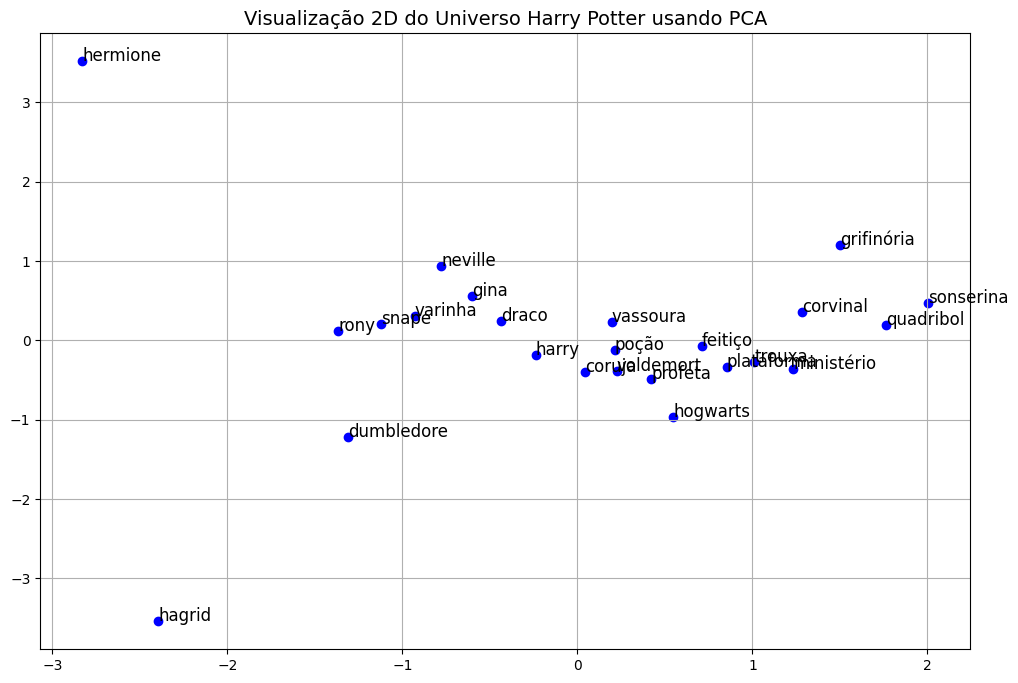

In [56]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Dados para visualização
harry_potter_words = ['harry', 'rony', 'hermione', 'dumbledore', 'voldemort', 'snape', 'draco', 
                      'hagrid', 'gina', 'neville', 'hogwarts', 'grifinória', 'sonserina', 
                      'lufa-lufa', 'corvinal', 'hogsmeade', 'ministério', 'plataforma', 
                      'quadribol', 'varinha', 'vassoura', 'coruja', 'feitiço', 'poção', 
                      'profeta', 'trouxa']

# Filtrar palavras existentes no vocabulário
palavras_para_plot = [palavra for palavra in harry_potter_words if palavra in model.wv.key_to_index]
vetores = [model.wv[palavra] for palavra in palavras_para_plot]

# PCA para redução de dimensionalidade
pca = PCA(n_components=2)
resultado_2d = pca.fit_transform(vetores)

plt.figure(figsize=(12, 8))
plt.scatter(resultado_2d[:, 0], resultado_2d[:, 1], color='blue')

# Adicionar rótulos
for i, palavra in enumerate(palavras_para_plot):
    plt.annotate(palavra, xy=(resultado_2d[i, 0], resultado_2d[i, 1]), fontsize=12)

plt.title('Visualização 2D do Universo Harry Potter usando PCA', fontsize=14)
plt.grid(True)
plt.show()

## Visualização de personagens

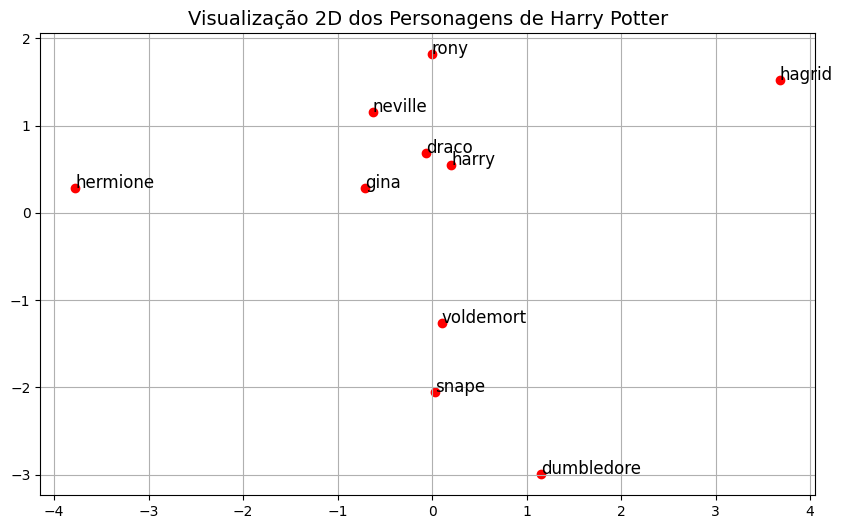

In [57]:
# Personagens
personagens = ['harry', 'rony', 'hermione', 'dumbledore', 'voldemort', 'snape', 'draco', 
              'hagrid', 'gina', 'neville']

personagens_filtrados = [p for p in personagens if p in model.wv.key_to_index]
vetores_personagens = [model.wv[p] for p in personagens_filtrados]

pca = PCA(n_components=2)
resultado_personagens_2d = pca.fit_transform(vetores_personagens)

plt.figure(figsize=(10, 6))
plt.scatter(resultado_personagens_2d[:, 0], resultado_personagens_2d[:, 1], color='red')

for i, personagem in enumerate(personagens_filtrados):
    plt.annotate(personagem, xy=(resultado_personagens_2d[i, 0], resultado_personagens_2d[i, 1]), fontsize=12)

plt.title('Visualização 2D dos Personagens de Harry Potter', fontsize=14)
plt.grid(True)
plt.show()

## Visualização de lugares

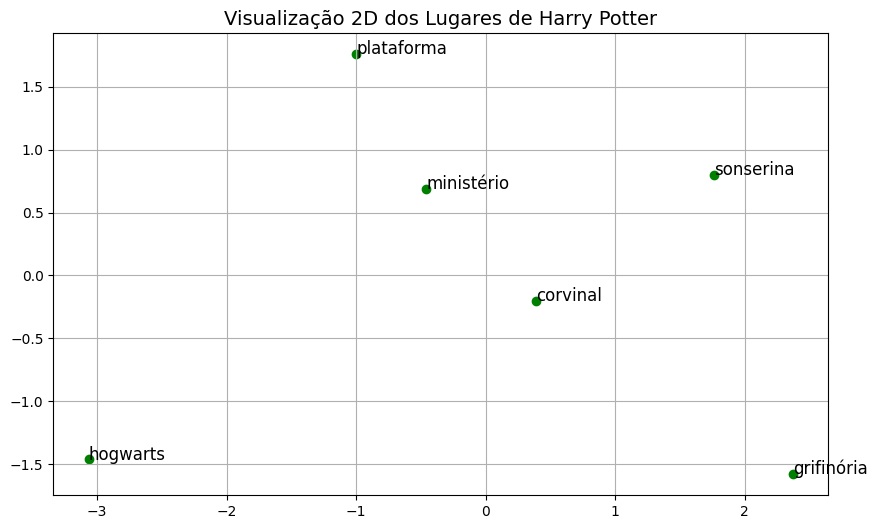

In [58]:
# Lugares
lugares = ['hogwarts', 'grifinória', 'sonserina', 'lufa-lufa', 'corvinal', 'hogsmeade', 
          'ministério', 'plataforma']

lugares_filtrados = [l for l in lugares if l in model.wv.key_to_index]
vetores_lugares = [model.wv[l] for l in lugares_filtrados]

pca = PCA(n_components=2)
resultado_lugares_2d = pca.fit_transform(vetores_lugares)

plt.figure(figsize=(10, 6))
plt.scatter(resultado_lugares_2d[:, 0], resultado_lugares_2d[:, 1], color='green')

for i, lugar in enumerate(lugares_filtrados):
    plt.annotate(lugar, xy=(resultado_lugares_2d[i, 0], resultado_lugares_2d[i, 1]), fontsize=12)

plt.title('Visualização 2D dos Lugares de Harry Potter', fontsize=14)
plt.grid(True)
plt.show()

## Guardar modelo para uso futuro

In [59]:
model.wv.save_word2vec_format('model.txt', binary=False)

## Visualização externa

Para visualizar os embeddings com o TensorFlow Projector:

1. Execute o comando para converter para o formato TensorFlow:
```
python -m gensim.scripts.word2vec2tensor --input model.txt --output model
```

2. Aceda ao site: https://projector.tensorflow.org/

3. Carregue os ficheiros gerados para explorar os embeddings.